## Imports

In [1]:
from glob import glob
import json
import numpy as np
import pandas as pd
import PIL

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style("dark", {'axes.grid' : False})
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load & display app screenshot images

In [2]:
app_imgs = glob('combined/*.jpg')
print('Total app screenshot images: {0:,}'.format(len(app_imgs)))
app_imgs[:5]

Total app screenshot images: 72,219


['combined/9733.jpg',
 'combined/14147.jpg',
 'combined/52112.jpg',
 'combined/63.jpg',
 'combined/6400.jpg']

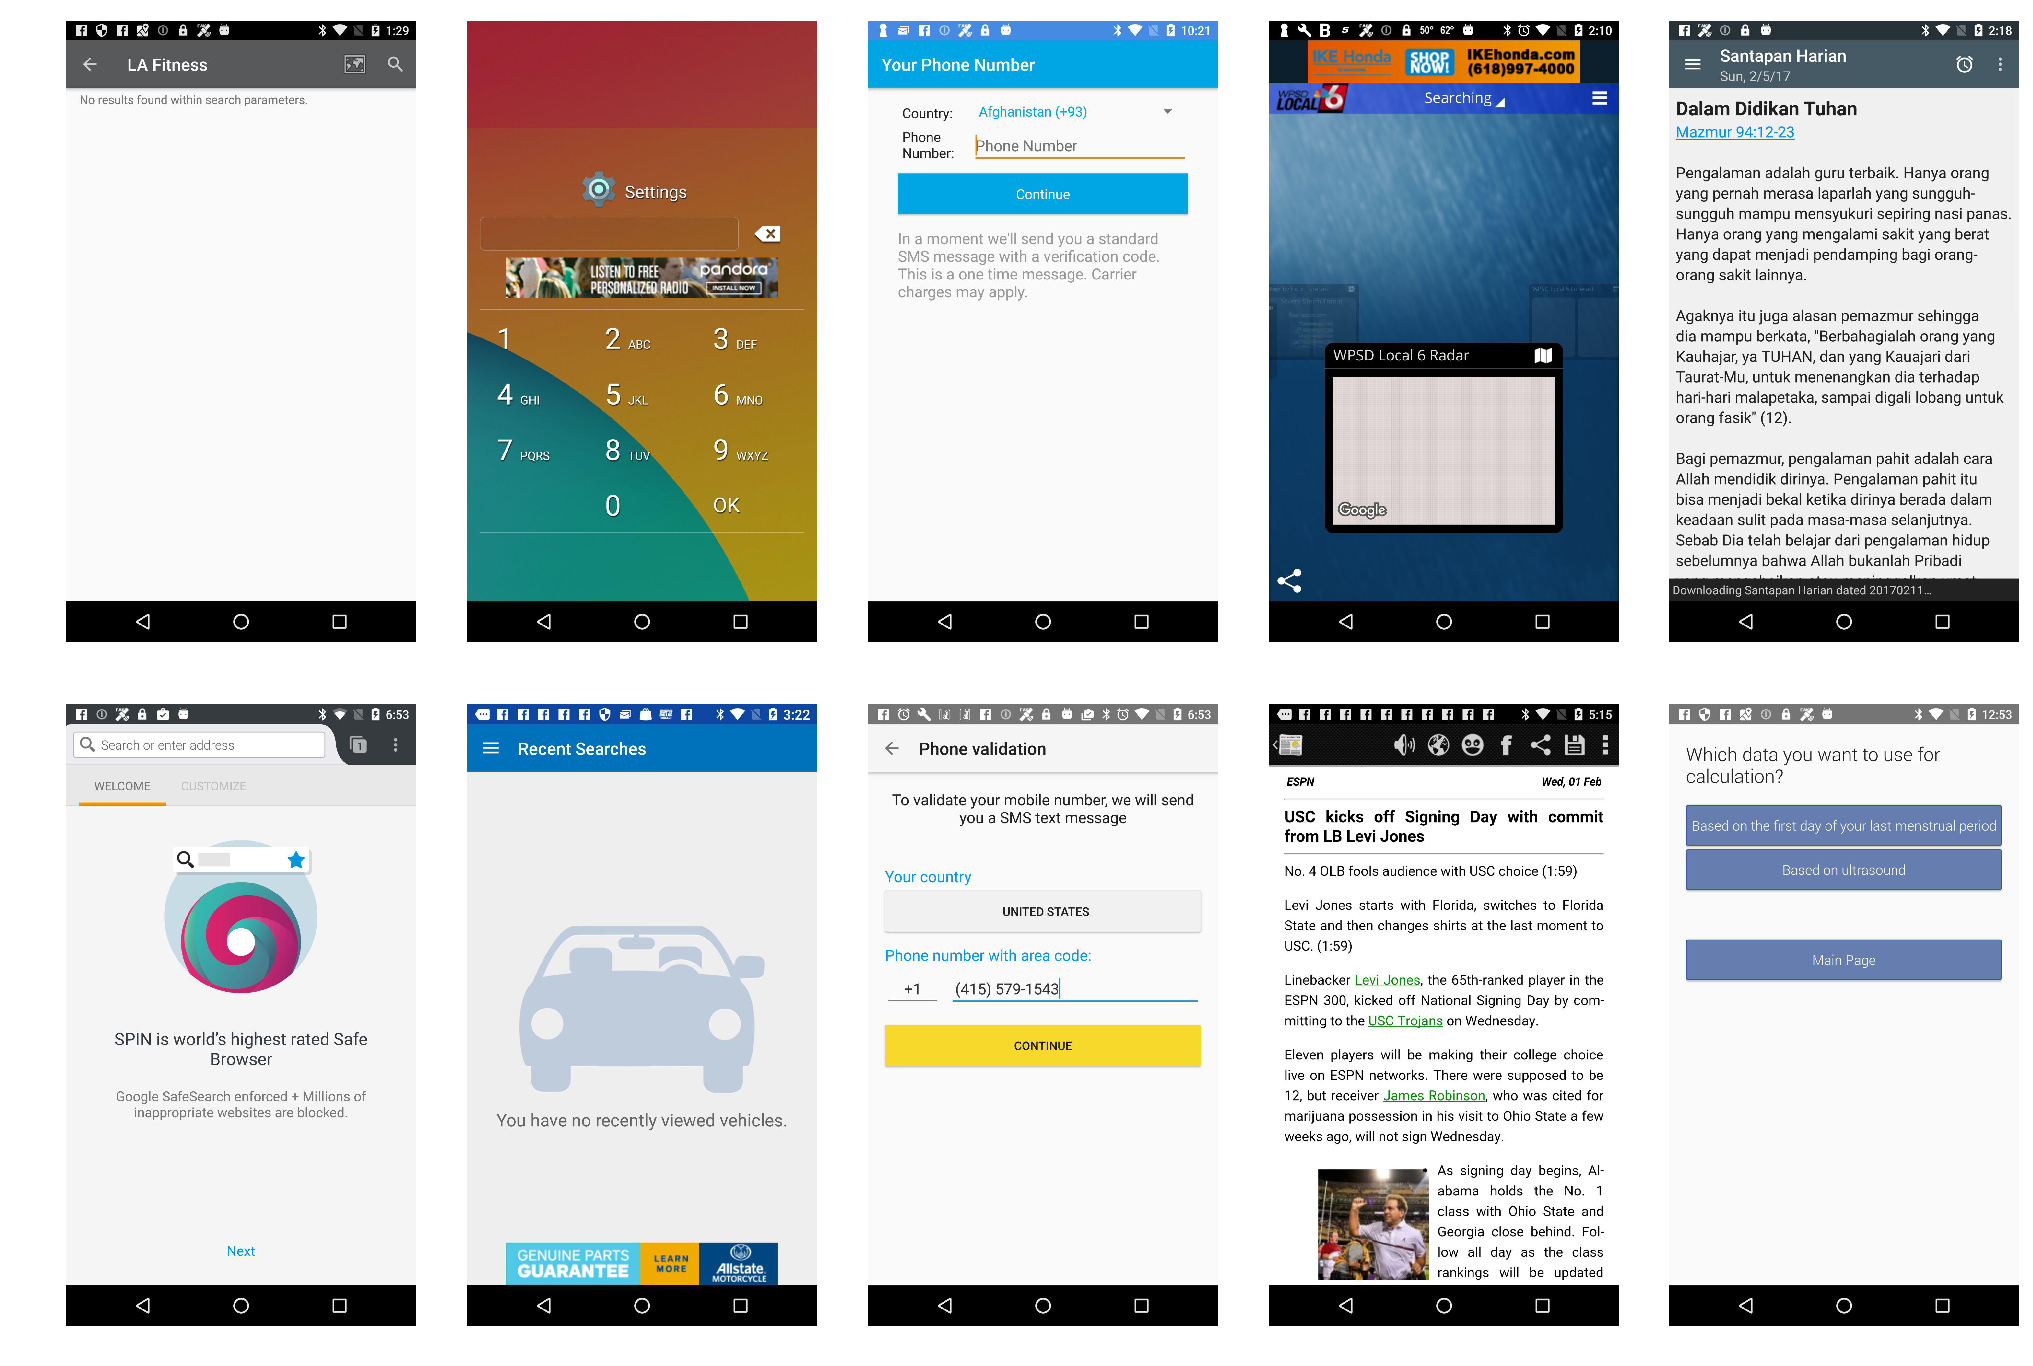

In [10]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.subplots_adjust(wspace=0, hspace=.1)

for i, img in enumerate(np.random.choice(app_imgs, 10)):
    img = PIL.Image.open(img)
    plt.subplot(2, 5, i + 1) 
    plt.imshow(img); plt.axis('off')

## App view hierarchy
This is essentially the structure of the app's UI based on the android code. For the purposes of this project, it does not provide any additional information.

In [11]:
with open('combined/2.json', 'r') as f:
    app_img_data = json.load(f)

print(app_img_data.keys())
print()
print(app_img_data['activity']['root'].keys())

dict_keys(['activity_name', 'activity', 'is_keyboard_deployed', 'request_id'])

dict_keys(['scrollable-horizontal', 'draw', 'ancestors', 'clickable', 'pressed', 'focusable', 'long-clickable', 'enabled', 'bounds', 'visibility', 'content-desc', 'rel-bounds', 'focused', 'selected', 'scrollable-vertical', 'children', 'adapter-view', 'abs-pos', 'pointer', 'class', 'visible-to-user'])


## UI details
Metadata about each UI screen.

In [12]:
ui_details = pd.read_csv('ui_details.csv')
ui_details.columns = [c.lower().replace(' ', '_') for c in ui_details.columns]
ui_details['filename'] = ui_details['ui_number'].map(lambda x: 'combined/' + str(x) + '.jpg')
ui_details.head()

,ui_number,app_package_name,interaction_trace_number,ui_number_in_trace,filename
0,0,com.brc.PeriodTrackerDiary,0,15,combined/0.jpg
1,1,com.brc.PeriodTrackerDiary,0,531,combined/1.jpg
2,2,yong.app.videoeditor,0,221,combined/2.jpg
3,3,yong.app.videoeditor,0,1289,combined/3.jpg
4,4,yong.app.videoeditor,0,125,combined/4.jpg


In [14]:
print('Shape: {0}'.format(ui_details.shape))
print('Total app screenshot images: {0:,}'.format(len(ui_details.ui_number.value_counts())))
print('Length of ui_number equals length app_imgs: {0}'.format(len(ui_details.ui_number.value_counts()) == len(app_imgs)))
print('Unique app packages: {0:,}'.format(len(ui_details.app_package_name.value_counts())))

Shape: (72219, 5)
Total app screenshot images: 72,219
Length of ui_number equals length app_imgs: True
Unique app packages: 9,772


#### App package frequency
Repeat app package names exist as the data include screenshots of different states within the same app.

In [15]:
ui_details.app_package_name.value_counts().head(10)

com.lazada.android                    76
com.fourtechnologies.mynetdiary.ad    73
com.jet.jet.app                       72
com.slacker.radio                     70
com.fivemobile.thescore               70
com.bigoven.android                   69
com.talabat                           65
com.jackthreads.android               64
com.bravolang.spanish                 63
com.mapmywalk.android2                62
Name: app_package_name, dtype: int64

#### Interaction traces
Each app has interaction traces which are comprised of a sequence of UIs captured as screenshots (essentially the flow of states a user experiences while using an app). Each app can have multiple traces, ie trace_0, trace_1, etc.  

In [16]:
ui_details.interaction_trace_number.value_counts()

0    62188
1     7520
2     2317
3      166
4       23
6        5
Name: interaction_trace_number, dtype: int64

**`ui_number_in_trace`** refers to the given screenshot's particular order in any given interaction trace

In [17]:
len(ui_details.ui_number_in_trace.value_counts())

5533

#### Display UIs with associated app package name to verify they match
Resize images for more convenient display and remove images that can't be opened with PIL

In [19]:
def img_resizer(filepath, new_width, new_height):
    img = PIL.Image.open(filepath)
    size = img.size
    if size[0] < size[1]:
        new_height = int(round(new_width * size[1] / size[0]))
        img_resized = img.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    else:
        new_width = int(round(new_height * size[1] / size[0]))
        img_resized = img.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    return img_resized

def img_validator(images):
    # this is slooooow
    corrupt_img_idx = []
    for i, x in enumerate(images):
        try:
            o = PIL.Image.open(x)
        except OSError as e:
            corrupt_img_idx.append(i)
            pass
    return corrupt_img_idx

In [20]:
corrupt_img_idx = img_validator(ui_details.filename)

In [12]:
ui_details.iloc[corrupt_img_idx]

,ui_number,app_package_name,interaction_trace_number,ui_number_in_trace,filename
33103,33103,org.msq.Face,0,505,combined/33103.jpg
50116,50116,com.cmgdigital.wsbtvhandset,0,1203,combined/50116.jpg
63677,63677,com.glow.android.nurture,0,292,combined/63677.jpg


In [13]:
ui_details.drop(corrupt_img_idx, inplace=True)
ui_details.shape

(72216, 5)

#### 5 random UIs

App package name: me.sync.callerid


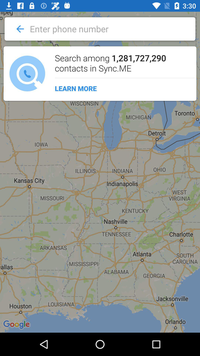

-------------------------------------------
App package name: org.pri.android


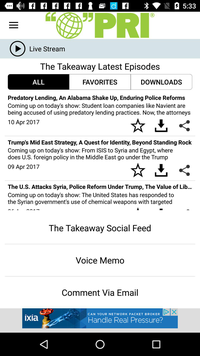

-------------------------------------------
App package name: com.electricfrenchfries.htct.free


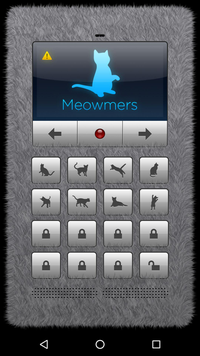

-------------------------------------------
App package name: com.memrise.android.memrisecompanion


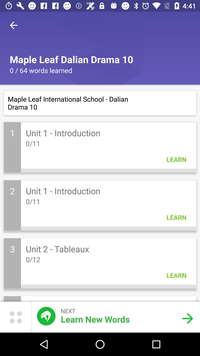

-------------------------------------------
App package name: com.phonegap.getpregnant


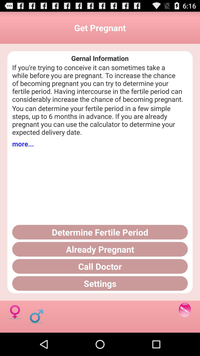

-------------------------------------------


In [14]:
random_idx = ui_details.sample(n=5, replace=False).index.values
for i in random_idx:
    print('App package name: {0}'.format(ui_details.app_package_name[i]))
    display(img_resizer(ui_details.filename[i], 200, 200))
    print('-------------------------------------------')

## App details: android play store metadata
Contains metadata about the apps in the dataset including an app’s category, average rating, number of ratings, and number of downloads. Unclear what "average rating" actually represents.

In [15]:
app_details = pd.read_csv('app_details.csv')
app_details.reset_index(level=0, inplace=True)
app_details.rename(columns = {'index':'App Package Name',
                              'App Package Name':'app name',
                              'Category':'star rating',
                              'Play Store Name': 'app category'}, inplace = True)
app_details.rename(columns = {}, inplace = True)
app_details.columns = [c.lower().replace(' ', '_') for c in app_details.columns]
app_details.head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings,number_of_downloads
0,com.guideme.movieboxa,New Movie?Box Show Reference,Books & Reference,3.2,83,"10,000 - 50,000",NaN
1,com.aon.mangaareader,Mangaa Reader,Comics,4.0,686,"10,000 - 50,000",NaN
2,com.diaohs.cola,Eye Filter (Blue light filter),Health & Fitness,4.6,2606,"100,000 - 500,000",NaN
3,com.pinnatta.android.api.fbmess,Pinnatta for Messenger,Social,4.3,6724,"100,000 - 500,000",NaN
4,com.digidust.elokence.akinator.freemium,Akinator the Genie FREE,Entertainment,4.3,1171971,"50,000,000 - 100,000,000",NaN


In [16]:
app_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18814 entries, 0 to 18813
Data columns (total 7 columns):
app_package_name       18814 non-null object
app_name               18814 non-null object
app_category           18814 non-null object
star_rating            18814 non-null float64
average_rating         18814 non-null int64
number_of_ratings      18814 non-null object
number_of_downloads    0 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.0+ MB


#### Drop `number_of_downloads` as it contains no info

In [17]:
app_details.drop(['number_of_downloads'], axis=1, inplace=True)

#### Explore `app_package_names` and `app_name `

In [18]:
print('Shape: {0}'.format(app_details.shape))
print('Unique app names: {0:,}'.format(len(app_details.app_name.value_counts())))
print('Unique app packages: {0:,}'.format(len(app_details.app_package_name.value_counts())))
print('Num of ui_details.app_package_name equals app_details.app_package_name: \n{0}'.format(len(ui_details.app_package_name.value_counts()) == len(app_details.app_package_name.value_counts())))

Shape: (18814, 6)
Unique app names: 11,062
Unique app packages: 10,954
Num of ui_details.app_package_name equals app_details.app_package_name: 
False


#### Some apps share app name but have a different app package name 
What this means: more general/utility type apps will often have generic names but are created by different developers.

In [19]:
app_details.app_name.value_counts().head()

Music Player                  20
Weather                       15
????                          14
Spanish English Translator    14
Voice Changer                 12
Name: app_name, dtype: int64

In [20]:
app_details[app_details.app_name == 'Music Player'].head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings
2689,music.search.player.mp3player.cut.music,Music Player,Music & Audio,4.2,76107,"5,000,000 - 10,000,000"
3951,com.jrtstudio.music,Music Player,Music & Audio,3.9,219762,"10,000,000 - 50,000,000"
5206,media.audioplayer.musicplayer,Music Player,Music & Audio,4.4,672634,"10,000,000 - 50,000,000"
6411,com.zentertain.music.player,Music Player,Music & Audio,4.3,33664,"1,000,000 - 5,000,000"
7511,com.fotoable.mp3.musicplayer,Music Player,Music & Audio,4.1,8415,"500,000 - 1,000,000"


#### Duplicate app package names
Appears as though app package names have duplicate entries, however they do differ on average rating.

In [21]:
app_details.app_package_name.value_counts().head()

com.olacabs.customer              4
com.crema.instant                 4
ipnossoft.rma.free                4
je.fit                            4
com.outfit7.tomlovesangelafree    4
Name: app_package_name, dtype: int64

In [22]:
app_details[app_details.app_package_name == 'com.truecaller'].head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings
3376,com.truecaller,Truecaller: Caller ID & Dialer,Communication,4.5,4227908,"100,000,000 - 500,000,000"
8394,com.truecaller,Truecaller: Caller ID & Dialer,Communication,4.5,4215519,"100,000,000 - 500,000,000"
15031,com.truecaller,Truecaller: Caller ID & Dialer,Communication,4.5,5045169,"100,000,000 - 500,000,000"
18269,com.truecaller,Truecaller: Caller ID & Dialer,Communication,4.5,4227597,"100,000,000 - 500,000,000"


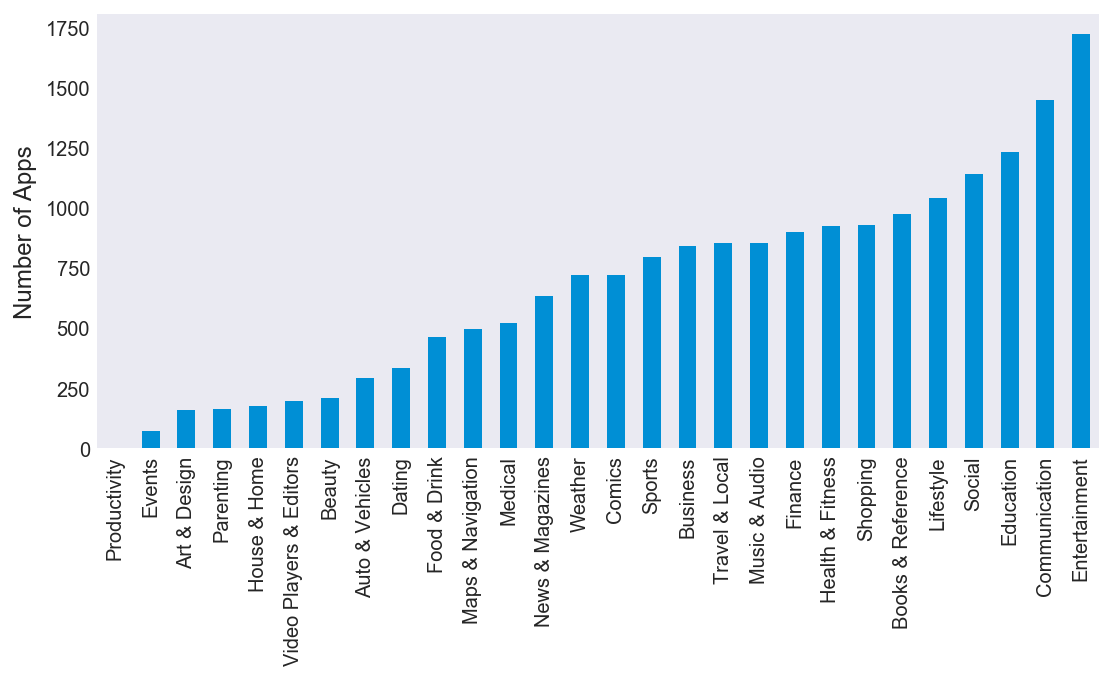

In [26]:
app_details.app_category.value_counts(ascending=True).plot.bar(figsize=(8,4)).set_ylabel('Number of Apps');

In [27]:
len(app_details.app_category.value_counts())

28

In [29]:
app_details[app_details.app_category == 'Productivity']

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings
18795,com.sftx.repost,Repost for Instagram RepostIt,Productivity,4.1,25836,"1,000,000 - 5,000,000"


In [33]:
app_details[app_details.app_category == 'Entertainment'].sort_values(by='star_rating', ascending=False).head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings
15352,com.crocusgames.destinyinventorymanager,Vault Item Manager for Destiny,Entertainment,4.8,1335,"10,000 - 50,000"
9220,com.jy.vplayer2,VSounds - Vine Soundboard Free,Entertainment,4.8,181790,"1,000,000 - 5,000,000"
11286,com.zpt.appgift,Cash Gift - Free Gift Cards,Entertainment,4.8,215295,"1,000,000 - 5,000,000"
18345,com.jy.vplayer2,VSounds - Vine Soundboard Free,Entertainment,4.8,181804,"1,000,000 - 5,000,000"
18119,com.zpt.appgift,Cash Gift - Free Gift Cards,Entertainment,4.8,215317,"1,000,000 - 5,000,000"


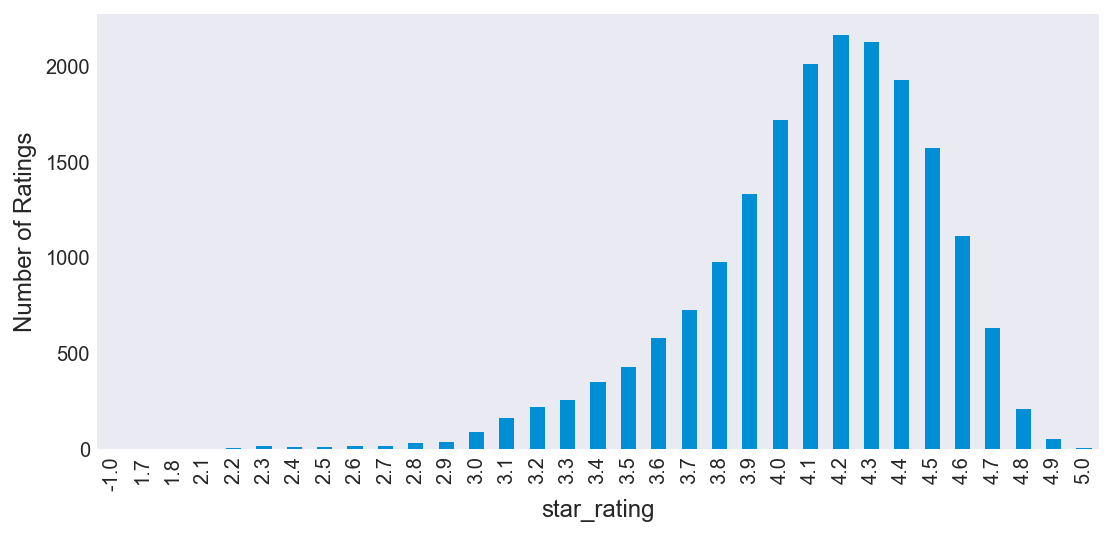

In [34]:
app_details.groupby('star_rating')['star_rating'].count().plot.bar(figsize=(8,4)).set_ylabel('Number of Ratings');

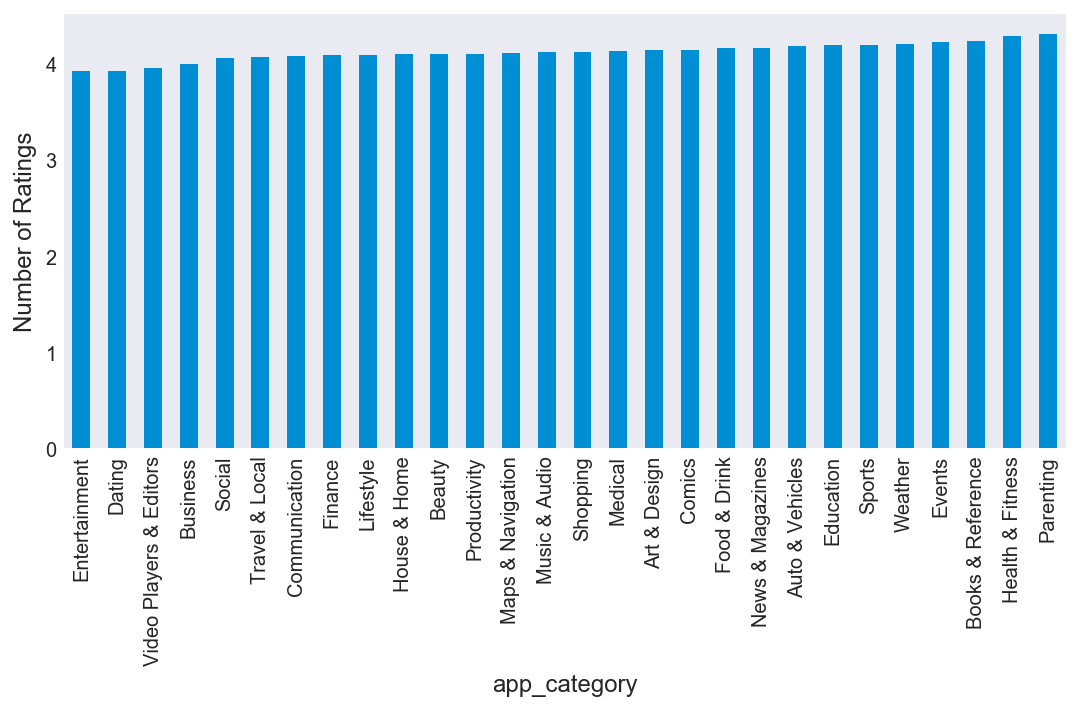

In [51]:
app_details.groupby('app_category')['star_rating'].mean().sort_values().plot.bar(figsize=(8,4)).set_ylabel('Number of Ratings');

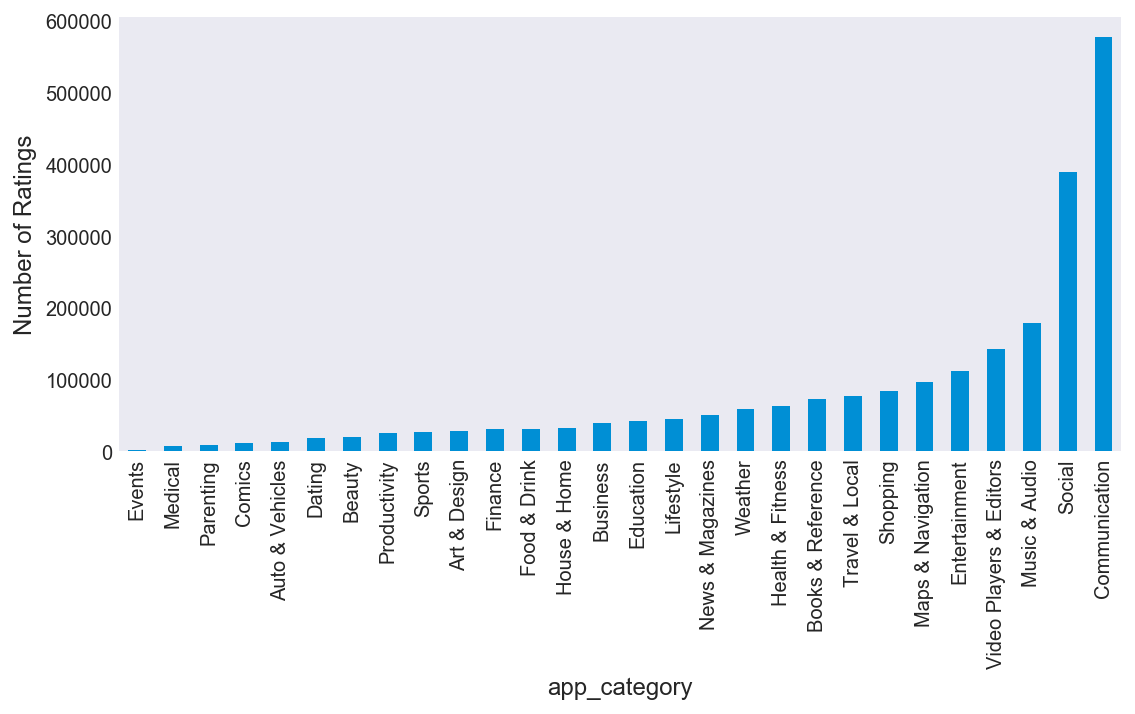

In [53]:
app_details.groupby('app_category')['average_rating'].mean().sort_values().plot.bar(figsize=(8,4)).set_ylabel('Number of Ratings');

In [54]:
app_details.groupby('app_category')['average_rating'].mean().head()

app_category
Art & Design         27937.335443
Auto & Vehicles      13553.356164
Beauty               20025.004785
Books & Reference    72607.655704
Business             40064.977461
Name: average_rating, dtype: float64

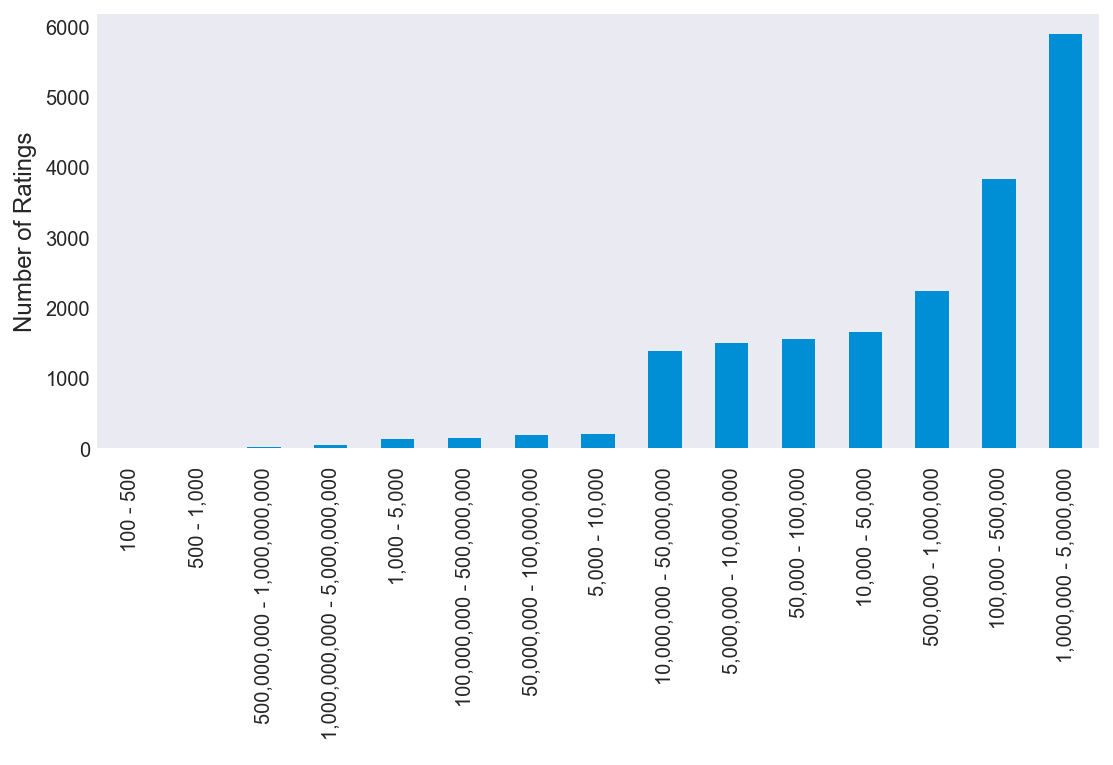

In [56]:
app_details.number_of_ratings.value_counts(ascending=True).plot.bar(figsize=(8,4)).set_ylabel('Number of Ratings');

## Merge ui_details and app_details dataframes
#### Groupby `app_package_name` to generate dataframe of unique names from `ui_details` dataframe
Capture `ui_number`, `interaction_trace_number`, `ui_number_in_trace`, and `filename` in groupby.

In [57]:
d1 = {'ui_number': lambda x: list(set(x)),
     'interaction_trace_number': lambda x: list(set(x)),
     'ui_number_in_trace': lambda x: list(set(x)),
     'filename': lambda x: list(set(x))}


ui_details_agg = ui_details.groupby('app_package_name').agg(d1)
ui_details_agg.reset_index(inplace=True)
ui_details_agg.head()

,app_package_name,ui_number,interaction_trace_number,ui_number_in_trace,filename
0,B4A.BigFivePersonalityTest,[49783],[0],[221],[combined/49783.jpg]
1,CN.MyPrivateMessages,[26083],[0],[15],[combined/26083.jpg]
2,DOCECG2.doctor,[51036],[0],[58],[combined/51036.jpg]
3,Gecko.Droid.PhysicsHelper,"[29868, 29869, 21237, 21238, 21239]","[0, 2]","[194, 269, 1361, 370, 285]","[combined/21237.jpg, combined/21238.jpg, combi..."
4,HinKhoj.Dictionary,"[42080, 42081, 42082, 42083, 42084, 42085, 420...",[1],"[864, 324, 741, 710, 132, 261, 876, 972, 654, ...","[combined/42084.jpg, combined/42080.jpg, combi..."


#### Again groupby `app_package_name` to generate dataframe of unique names in `app_details` dataframe
Capture app name, app category, and number of ratings as lists in groupby.

In [58]:
d2 = {'app_name': lambda x: list(set(x)),
     'app_category': lambda x: list(set(x)),
     'star_rating': 'mean',
     'average_rating': 'mean',
     'number_of_ratings': lambda x: list(set(x))}


app_details_agg = app_details.groupby('app_package_name').agg(d2)
app_details_agg.reset_index(inplace=True)
app_details_agg.head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings
0,B4A.BigFivePersonalityTest,[Big 5 Personality Test],[Education],3.6,6698.000000,"[ 1,000,000 - 5,000,000 ]"
1,CN.MyPrivateMessages,[Calculator],[Communication],4.3,16952.333333,"[ 1,000,000 - 5,000,000 ]"
2,Cam.SILENT,[Uva Silent Widget Camera Free],[Video Players & Editors],3.9,9616.000000,"[ 5,000,000 - 10,000,000 ]"
3,DOCECG2.doctor,[Electrocardiogram ECG Types],[Medical],3.9,4134.500000,"[ 500,000 - 1,000,000 ]"
4,Gecko.Droid.PhysicsHelper,[Pocket Physics],[Education],4.1,15938.000000,"[ 1,000,000 - 5,000,000 ]"


In [59]:
app_details_agg.app_package_name.shape, ui_details_agg.app_package_name.shape

((10954,), (9771,))

In [60]:
app_details_agg.app_package_name.isin(ui_details_agg.app_package_name).value_counts()

True     9735
False    1219
Name: app_package_name, dtype: int64

In [61]:
ui_details_agg.app_package_name.isin(app_details_agg.app_package_name).value_counts()

True     9735
False      36
Name: app_package_name, dtype: int64

In [62]:
app_details_agg_lst = app_details_agg.app_package_name.values.tolist()

In [63]:
ui_details_agg_lst = ui_details_agg.app_package_name.values.tolist()

In [64]:
len([i for i in app_details_agg_lst if i not in ui_details_agg_lst])

1219

In [65]:
len([i for i in ui_details_agg_lst if i not in app_details_agg_lst])

36

In [66]:
len(set(app_details_agg_lst).intersection(ui_details_agg_lst))

9735

In [67]:
len(set(ui_details_agg_lst).intersection(app_details_agg_lst))

9735

In [68]:
result = pd.merge(app_details_agg, ui_details_agg, on='app_package_name')

In [69]:
result.shape

(9735, 10)

In [70]:
result.head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings,ui_number,interaction_trace_number,ui_number_in_trace,filename
0,B4A.BigFivePersonalityTest,[Big 5 Personality Test],[Education],3.6,6698.000000,"[ 1,000,000 - 5,000,000 ]",[49783],[0],[221],[combined/49783.jpg]
1,CN.MyPrivateMessages,[Calculator],[Communication],4.3,16952.333333,"[ 1,000,000 - 5,000,000 ]",[26083],[0],[15],[combined/26083.jpg]
2,DOCECG2.doctor,[Electrocardiogram ECG Types],[Medical],3.9,4134.500000,"[ 500,000 - 1,000,000 ]",[51036],[0],[58],[combined/51036.jpg]
3,Gecko.Droid.PhysicsHelper,[Pocket Physics],[Education],4.1,15938.000000,"[ 1,000,000 - 5,000,000 ]","[29868, 29869, 21237, 21238, 21239]","[0, 2]","[194, 269, 1361, 370, 285]","[combined/21237.jpg, combined/21238.jpg, combi..."
4,HinKhoj.Dictionary,[English Hindi Dictionary],[Books & Reference],4.3,247099.000000,"[ 10,000,000 - 50,000,000 ]","[42080, 42081, 42082, 42083, 42084, 42085, 420...",[1],"[864, 324, 741, 710, 132, 261, 876, 972, 654, ...","[combined/42084.jpg, combined/42080.jpg, combi..."


In [71]:
result.to_pickle('merged_data/app_ui_df.pkl')

In [72]:
app_ui_df = pd.read_pickle('merged_data/app_ui_df.pkl')
app_ui_df.head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings,ui_number,interaction_trace_number,ui_number_in_trace,filename
0,B4A.BigFivePersonalityTest,[Big 5 Personality Test],[Education],3.6,6698.000000,"[ 1,000,000 - 5,000,000 ]",[49783],[0],[221],[combined/49783.jpg]
1,CN.MyPrivateMessages,[Calculator],[Communication],4.3,16952.333333,"[ 1,000,000 - 5,000,000 ]",[26083],[0],[15],[combined/26083.jpg]
2,DOCECG2.doctor,[Electrocardiogram ECG Types],[Medical],3.9,4134.500000,"[ 500,000 - 1,000,000 ]",[51036],[0],[58],[combined/51036.jpg]
3,Gecko.Droid.PhysicsHelper,[Pocket Physics],[Education],4.1,15938.000000,"[ 1,000,000 - 5,000,000 ]","[29868, 29869, 21237, 21238, 21239]","[0, 2]","[194, 269, 1361, 370, 285]","[combined/21237.jpg, combined/21238.jpg, combi..."
4,HinKhoj.Dictionary,[English Hindi Dictionary],[Books & Reference],4.3,247099.000000,"[ 10,000,000 - 50,000,000 ]","[42080, 42081, 42082, 42083, 42084, 42085, 420...",[1],"[864, 324, 741, 710, 132, 261, 876, 972, 654, ...","[combined/42084.jpg, combined/42080.jpg, combi..."


In [73]:
app_ui_df.shape

(9735, 10)

In [74]:
len(app_ui_df.app_package_name.value_counts())

9735

In [75]:
app_ui_df[app_ui_df.app_name.map(lambda x: len(x)) > 1].shape

(344, 10)

In [76]:
app_ui_df[app_ui_df.app_name.map(lambda x: len(x)) > 1].head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings,ui_number,interaction_trace_number,ui_number_in_trace,filename
21,air.Chat.org,"[Video Chat Rooms, Video Chat Rooms - Look2cam]",[Social],4.00,16470.0,"[ 1,000,000 - 5,000,000 ]",[20513],[2],[15],[combined/20513.jpg]
52,air.com.flaxbin.chat,"[ChatVideo ? Meet new people, ChatVideo - Free...",[Dating],4.10,41147.0,"[ 1,000,000 - 5,000,000 ]","[69434, 69435, 69436]",[0],"[130, 334, 1543]","[combined/69435.jpg, combined/69436.jpg, combi..."
97,air.net.thedigitalsits.molfar.prankcalldial,"[Prankster - Prank Call App, Prankster - the P...",[Entertainment],4.35,17692.0,"[ 100,000 - 500,000 , 500,000 - 1,000,000 ]","[30017, 30018]",[0],"[62, 63]","[combined/30017.jpg, combined/30018.jpg]"
123,and.p2l,"[Mobile Phone Number 2 Location, Phone 2 Locat...",[Communication],4.10,83486.5,"[ 5,000,000 - 10,000,000 ]",[12294],[0],[101],[combined/12294.jpg]
144,app.hurdlr.com,"[Hurdlr - 1099 Taxes & Mileage, Hurdlr for Dri...",[Business],4.65,1318.0,"[ 50,000 - 100,000 ]","[506, 507, 508, 509]",[0],"[505, 331, 611, 305]","[combined/508.jpg, combined/509.jpg, combined/..."


In [77]:
app_ui_df[app_ui_df.app_category.map(lambda x: len(x)) > 1].shape

(55, 10)

In [78]:
app_ui_df[app_ui_df.app_category.map(lambda x: len(x)) > 1].head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings,ui_number,interaction_trace_number,ui_number_in_trace,filename
329,co.bikecomputer,[Bike Computer],"[Health & Fitness, Sports]",4.55,1230.5,"[ 10,000 - 50,000 , 100,000 - 500,000 ]","[9475, 9476, 9477, 9478, 9479, 9480]",[0],"[69, 17, 116, 125, 61, 30]","[combined/9480.jpg, combined/9475.jpg, combine..."
335,co.clover.clover,[Clover Dating App],"[Social, Dating]",4.05,4592.5,"[ 100,000 - 500,000 ]","[55475, 55476, 55477, 55478, 55479]",[0],"[429, 118, 1174, 854, 825]","[combined/55477.jpg, combined/55478.jpg, combi..."
672,com.affinity.dallas_football,[Dallas Football Louder Rewards],"[Social, Sports]",4.50,7345.5,"[ 100,000 - 500,000 ]","[64424, 60945]","[1, 2]","[72, 287]","[combined/60945.jpg, combined/64424.jpg]"
674,com.affinity.pittsburgh_football,[Pittsburgh Football Rewards],"[Social, Sports]",4.40,3706.5,"[ 100,000 - 500,000 ]","[24586, 61135]","[0, 2]","[2, 127]","[combined/24586.jpg, combined/61135.jpg]"
807,com.amrelmadah.freelancing.zawagalan,[Marriage Mediator],"[Social, Dating]",4.05,486.0,"[ 100,000 - 500,000 , 50,000 - 100,000 ]","[11136, 11137, 11138, 11139, 11140, 11141, 111...",[0],"[1152, 900, 1191, 775, 1193, 656, 1265, 1234, ...","[combined/11135.jpg, combined/11133.jpg, combi..."


In [79]:
app_ui_df[app_ui_df.number_of_ratings.map(lambda x: len(x)) > 1].shape

(1029, 10)

In [80]:
app_ui_df[app_ui_df.number_of_ratings.map(lambda x: len(x)) > 1].head()

,app_package_name,app_name,app_category,star_rating,average_rating,number_of_ratings,ui_number,interaction_trace_number,ui_number_in_trace,filename
42,air.com.animangaplus.johnnytest01,[Johnny Test: Johnny X],[Comics],4.10,421.5,"[ 10,000 - 50,000 , 50,000 - 100,000 ]",[17298],[0],[14],[combined/17298.jpg]
44,air.com.animangaplus.totallyspies01,[Totally Spies!],[Comics],4.00,2077.0,"[ 100,000 - 500,000 , 50,000 - 100,000 ]",[41239],[0],[9],[combined/41239.jpg]
48,air.com.designersofcode.lovecraftcollectionvol1,[Lovecraft Collection ? Vol. 1],[Comics],4.80,5733.0,"[ 10,000 - 50,000 , 100,000 - 500,000 ]","[18915, 18916]",[0],"[3474, 3]","[combined/18915.jpg, combined/18916.jpg]"
73,air.com.nbcuni.com.telemundo.envivo,[Telemundo Deportes - En Vivo],[Sports],4.25,4946.0,"[ 100,000 - 500,000 , 500,000 - 1,000,000 ]","[64041, 70349, 70350, 70351, 70352, 70353]","[0, 1]","[1216, 740, 710, 6, 211, 446]","[combined/64041.jpg, combined/70353.jpg, combi..."
97,air.net.thedigitalsits.molfar.prankcalldial,"[Prankster - Prank Call App, Prankster - the P...",[Entertainment],4.35,17692.0,"[ 100,000 - 500,000 , 500,000 - 1,000,000 ]","[30017, 30018]",[0],"[62, 63]","[combined/30017.jpg, combined/30018.jpg]"


In [22]:
embeddings = np.load('ui_layout_vectors/ui_vectors.npy')

embeddings.shape

(72103, 64)

In [23]:
embeddings[0]

array([ 0.49343213,  0.        ,  0.        ,  1.53651595,  0.        ,
        0.35794488,  0.        ,  0.23277104,  0.95115042,  2.208148  ,
        0.10892372,  0.55113822,  0.        ,  0.22959103,  0.        ,
        0.        ,  1.32388139,  0.        ,  0.        ,  2.77431679,
        0.21085466,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.4383038 ,  0.        ,  0.64195049,  0.        ,  0.        ,
        0.        ,  0.57656568,  0.        ,  0.        ,  0.        ,
        0.80384398,  1.01261497,  0.        ,  0.        ,  0.        ,
        2.54284668,  1.35900021,  0.        ,  0.        ,  0.        ,
        0.        ,  0.30621642,  2.27725053,  0.        ,  1.22541595,
        1.36793232,  0.11166108,  0.        ,  1.08412075,  0.41839796,
        0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

In [73]:
with open('ui_layout_vectors/ui_names.json', 'r') as f:
    ui_names = json.load(f)

In [37]:
len(ui_names)

1

In [74]:
len(ui_names['ui_names'])

72103

In [75]:
ui_names

{'ui_names': ['28335.png',
  '21576.png',
  '20353.png',
  '49217.png',
  '26004.png',
  '65583.png',
  '41233.png',
  '67882.png',
  '47128.png',
  '69553.png',
  '8169.png',
  '41044.png',
  '58721.png',
  '41724.png',
  '48039.png',
  '49150.png',
  '5325.png',
  '28767.png',
  '15343.png',
  '9835.png',
  '31854.png',
  '61692.png',
  '38022.png',
  '64909.png',
  '13779.png',
  '56189.png',
  '30862.png',
  '13541.png',
  '48673.png',
  '3325.png',
  '12163.png',
  '4506.png',
  '66012.png',
  '71559.png',
  '4979.png',
  '2766.png',
  '9179.png',
  '17995.png',
  '8056.png',
  '12314.png',
  '12461.png',
  '4531.png',
  '60657.png',
  '26312.png',
  '12290.png',
  '66776.png',
  '2212.png',
  '21791.png',
  '57313.png',
  '7690.png',
  '46925.png',
  '7215.png',
  '5274.png',
  '61379.png',
  '11013.png',
  '24307.png',
  '25131.png',
  '31528.png',
  '59999.png',
  '62246.png',
  '21838.png',
  '44728.png',
  '28176.png',
  '63403.png',
  '53214.png',
  '26198.png',
  '20857.png

In [90]:
import matplotlib.pyplot as plt


from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

In [91]:
image = img_as_ubyte(data.camera())

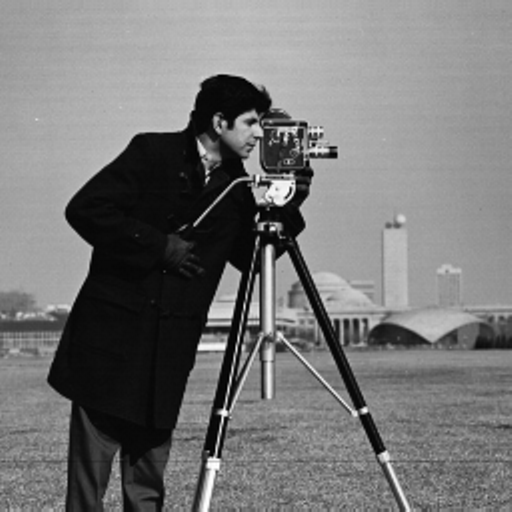

In [94]:
Image.fromarray(image)

In [97]:
ent = entropy(image, disk(5))

In [99]:
ent.shape

(512, 512)

In [95]:
# First example: object detection.

noise_mask = 28 * np.ones((128, 128), dtype=np.uint8)
noise_mask[32:-32, 32:-32] = 30

noise = (noise_mask * np.random.random(noise_mask.shape) - 0.5 *
         noise_mask).astype(np.uint8)
img = noise + 128

entr_img = entropy(img, disk(10))

In [100]:
entr_img.shape

(128, 128)

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

ax0.imshow(noise_mask, cmap='gray')
ax0.set_xlabel("Noise mask")
ax1.imshow(img, cmap='gray')
ax1.set_xlabel("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_xlabel("Local entropy")

fig.tight_layout()